<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [26]:
from scipy import stats
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


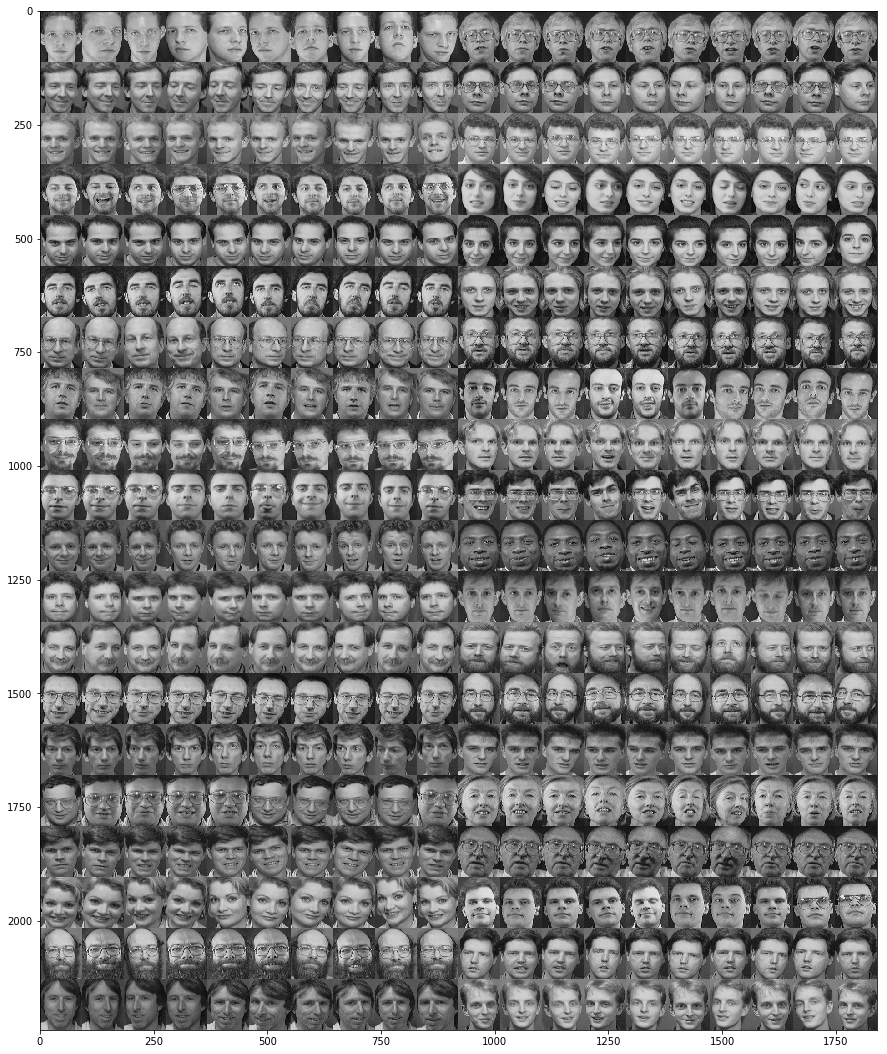

In [3]:
V = loadmat('attfaces.mat')['V']
show_image(V,20,20)

In [4]:
def init_w_h(F, N, K,a_w=1,b_w=1,a_h=1,b_h=1):
    W = stats.gamma.rvs(a_w, scale = 1/b_w, size=(F,K))
    H = stats.gamma.rvs(a_h, scale = 1/b_h, size=(K,N))
    return W,H

In [47]:
def em_step(V, W, H, a_w, b_w, a_h, b_h, n_iter=10000, tol=1e-5):
    F = V.shape[0]
    N = V.shape[1]
    K = W.shape[1] 
    like_hoods = np.zeros(n_iter)
    w_sums = np.zeros(n_iter)
    h_sums = np.zeros(n_iter)

    old_likehood = 0
    for i in range(n_iter):
#         log_likehood = np.sum(V * ((W * np.log(W)).dot(H) + W.dot(H * np.log(H))) / W.dot(H)) + \
#             np.sum((a_w - 1) * np.log(W) - b_w * W) + \
#             np.sum((a_h - 1) * np.log(H) - b_h * H)
#         like_hoods[i] = log_likehood
#         diff = log_likehood - old_likehood
#         old_likehood = log_likehood
#         if np.abs(diff) < tol:
#             break

        W_num = a_w - 1 + W * ((V/(W.dot(H))).dot(H.T))
        W_div = b_w + np.repeat([H.sum(axis=1)], F, axis=0)
        _W = W_num / W_div
        w_sums[i] = np.sum(np.abs(W-_W))

        H_num = a_h - 1 + H * (W.T.dot(V/(W.dot(H))))
        H_div = b_h + np.repeat([W.sum(axis=0)], N, axis=0).T
        _H = H_num / H_div
        h_sums[i] =  np.sum(np.abs(H-_H))

        W = _W
        H = _H
    return like_hoods, w_sums, h_sums

In [48]:
(F,N) = V.shape
K = 25
W,H = init_w_h(F,N,K)

In [49]:
like_hoods, w_sums, h_sums =em_step(V,W,H,1.0,1.0,1.0,1.0)

In [50]:
likehood = np.sum(V * ((W * np.log(W)).dot(H) + W.dot(H * np.log(H))) / W.dot(H)) + \
    np.sum((a_w - 1) * np.log(W) - b_w * W) + \
    np.sum((a_h - 1) * np.log(H) - b_h * H)

NameError: name 'a_w' is not defined

In [ ]:
W_num = a_w - 1 + W* ((V/(W.dot(H))).dot(H.T))
W_div = b_w + np.repeat( [H.sum(axis=1)],F, axis=0)
W = W_num / W_div

In [ ]:
H_num = a_h - 1 + H* (W.T.dot(V/(W.dot(H))))
H_div = b_h + np.repeat( [W.sum(axis=0)],N, axis=0).T
H = H_num / H_div

In [ ]:
n_iter = 100
tol=1e-10

In [ ]:
like_hoods = []
w_sums=[]
h_sums = []
diffs = []

W,H = init_w_h(F,N,K)
old_likehood = 0
for i in range(n_iter):
    log_likehood = np.sum(V * ((W * np.log(W)).dot(H) + W.dot(H * np.log(H))) / W.dot(H)) + \
        np.sum((a_w - 1) * np.log(W) - b_w * W) + \
        np.sum((a_h - 1) * np.log(H) - b_h * H)
    like_hoods.append(np.abs(log_likehood))
    diff = np.abs(log_likehood - old_likehood)
    diffs.append(diff)
    old_likehood = np.abs(log_likehood)
    print(np.abs(diff))
    if np.abs(diff) < tol:
        break;
    
    
    W_num = a_w - 1 + W* ((V/(W.dot(H))).dot(H.T))
    W_div = b_w + np.repeat( [H.sum(axis=1)],F, axis=0)
    _W = W_num / W_div
    w_sums.append(np.sum(np.abs(W-_W)))
    
    H_num = a_h - 1 + H* (W.T.dot(V/(W.dot(H))))
    H_div = b_h + np.repeat( [W.sum(axis=0)],N, axis=0).T
    _H = H_num / H_div
    h_sums.append(np.sum(np.abs(H-_H)))

    
    W = _W
    H = _H

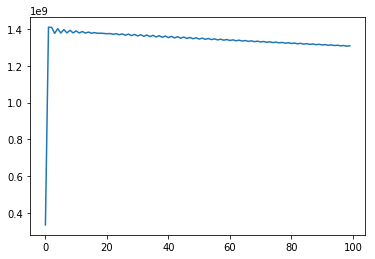

In [201]:
plt.plot(diffs)

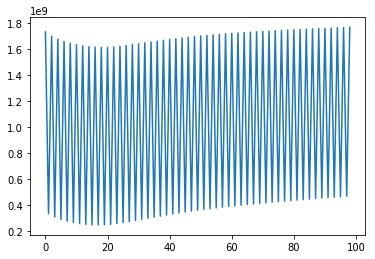

In [194]:
plt.plot(like_hoods[1:100])

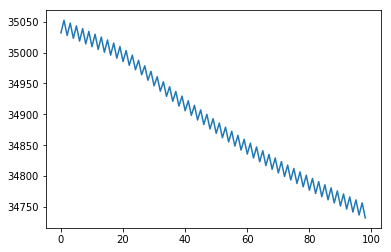

In [195]:
plt.plot(h_sums[1:])

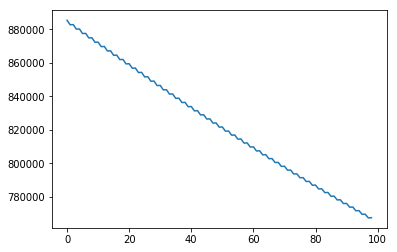

In [196]:
plt.plot(w_sums[1:])

In [102]:
V* ((W*np.log(W)).dot(H) + W.dot(H*np.log(H)))

array([[  50.91675084,  592.18202021,   25.00051075, ..., 5595.43669287,
        5822.99322865, 6238.10883018],
       [  58.78630642,  592.74682975,   86.67185648, ..., 5403.39910151,
        5561.03100628, 6156.21673383],
       [  71.23601135,  600.43955827,  -75.45491652, ..., 5574.41149986,
        5768.96986658, 5732.0554037 ],
       ...,
       [ -84.52260991,  797.49597717,  -22.76707074, ...,  198.51687441,
        1975.96639442,  657.6959049 ],
       [ -51.31228624,  818.0081798 ,   27.37616354, ...,  151.99850703,
        1849.66031554,  562.23805739],
       [  70.74851876,  900.88597963,  183.65331045, ...,  139.95048647,
        1540.18427501,  622.499208  ]])

In [94]:
W.dot(H*np.log(H)).shape

(10304, 400)

In [140]:
np.mean(np.abs(V - W.dot(H)))

85.40609155201517

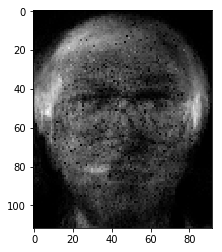

In [141]:
plt.imshow(W[:,1].reshape(92,112).T, 'gray')

In [144]:
new_W.shape

(112, 92, 25)

In [158]:
min_v = np.min(W, axis=0)
max_v = np.max(W, axis=0)

X = (W-min_v) / (max_v - min_v) * 255

In [164]:
np.max(X, axis=0)

array([255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255.])

In [174]:
%%cython

UsageError: Cell magic `%%cython` not found.


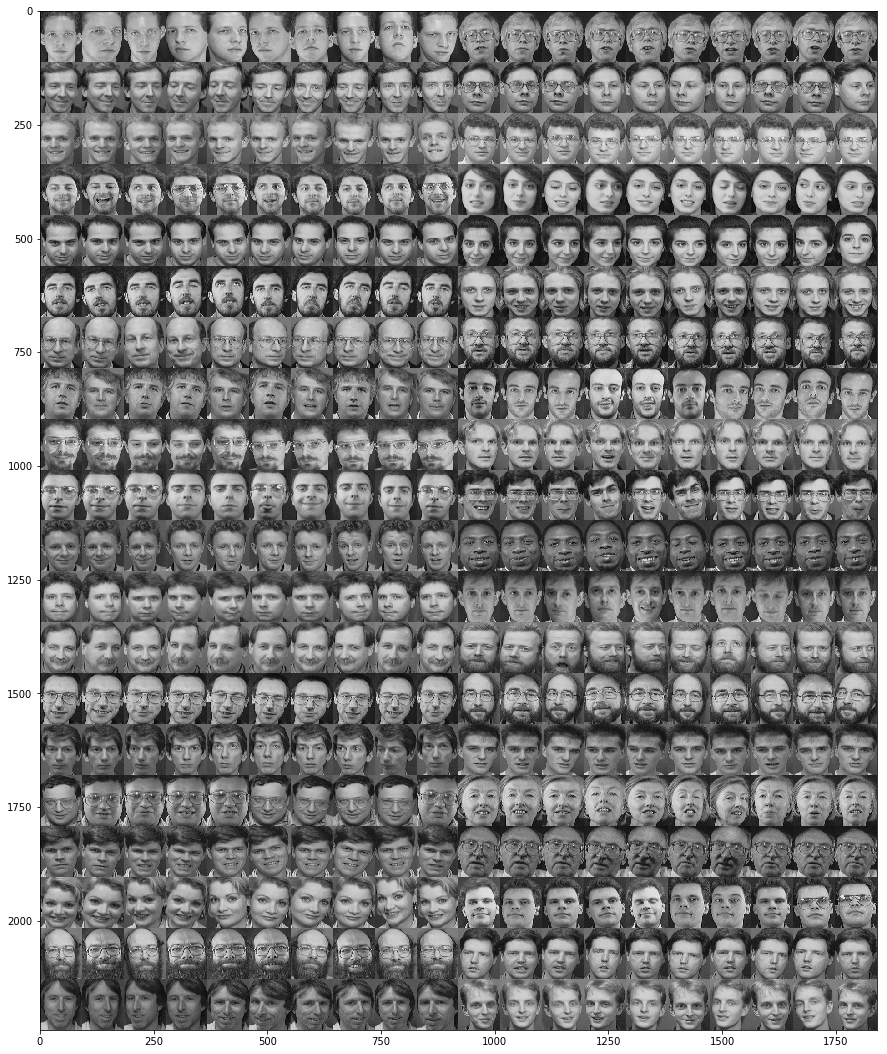

In [170]:
show_image(V, 20, 20)

In [63]:
W_init,H_init = init_w_h(F,N,K)

In [64]:
W = W_init.copy()
H = H_init.copy()

    
# update W
no_part_no = np.einsum('ij,kj->ijk', V, H)
no_part_de = np.matmul(W, H)
no = no_part_no / no_part_de[:,:, np.newaxis]
de = np.sum(H, axis=1) 
W = W * np.sum(no, axis=1) / de[np.newaxis,:]

# update H
no_part_no = np.einsum('ij,ik->ikj', V, W)
no_part_de = np.matmul(W, H)
no = no_part_no / no_part_de[:,np.newaxis,:]
de = np.sum(W, axis=0) 
H = H * np.sum(no, axis=0) / de[:,np.newaxis]

W_x = W
H_x = H


In [65]:
W = W_init.copy()
H = H_init.copy()

WH = W.dot(H)

W_num = W * ((V / WH).dot(H.T))
W_div = np.repeat([H.sum(axis=1)], F, axis=0)
_W = W_num / W_div
        
H_num =  H * (W.T.dot(V / WH))
H_div =  np.repeat([W.sum(axis=0)], N, axis=0).T
_H = H_num / H_div

W_z = W
H_z = H

In [66]:
np.sum( np.abs(W_x - W_z))

891625.9189852962

In [ ]:
np.sum(W_x - W_z)